In [32]:
import pandas as pd
import ipywidgets 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [33]:
data = pd.read_csv("/Users/juhilokare/Desktop/freedom.csv", encoding='unicode_escape', sep=';')

In [34]:
countries = ['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom' ]
year = 2021

In [35]:
filtered_data = data[(data['Countries'].isin(countries)) & (data['Year'] == year)].copy() 

In [36]:

european_countries = ['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']


european_data = data[data['Countries'].isin(european_countries)]

In [37]:
variables = ['5B  Labor market regulations']

In [38]:
for var in variables:
    try:

        if european_data[var].dtype == 'object':
            european_data.loc[:, var] = european_data[var].str.replace(',', '.').astype(float)

        european_data.loc[:, var] = pd.to_numeric(european_data[var], errors='coerce')
    except Exception as e:
        print(f"Error processing column {var}: {e}")

In [39]:
pivoted_data = european_data.pivot_table(index='Countries', columns='Year', values=variables)

In [40]:
for col in variables:
    pivoted_data[col] = pivoted_data[col].apply(pd.to_numeric, errors='coerce')

In [ ]:
#This heatmap shows the intensity of labor market regulations in European countries from 1970 to 2021. 

/Users/juhilokare/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



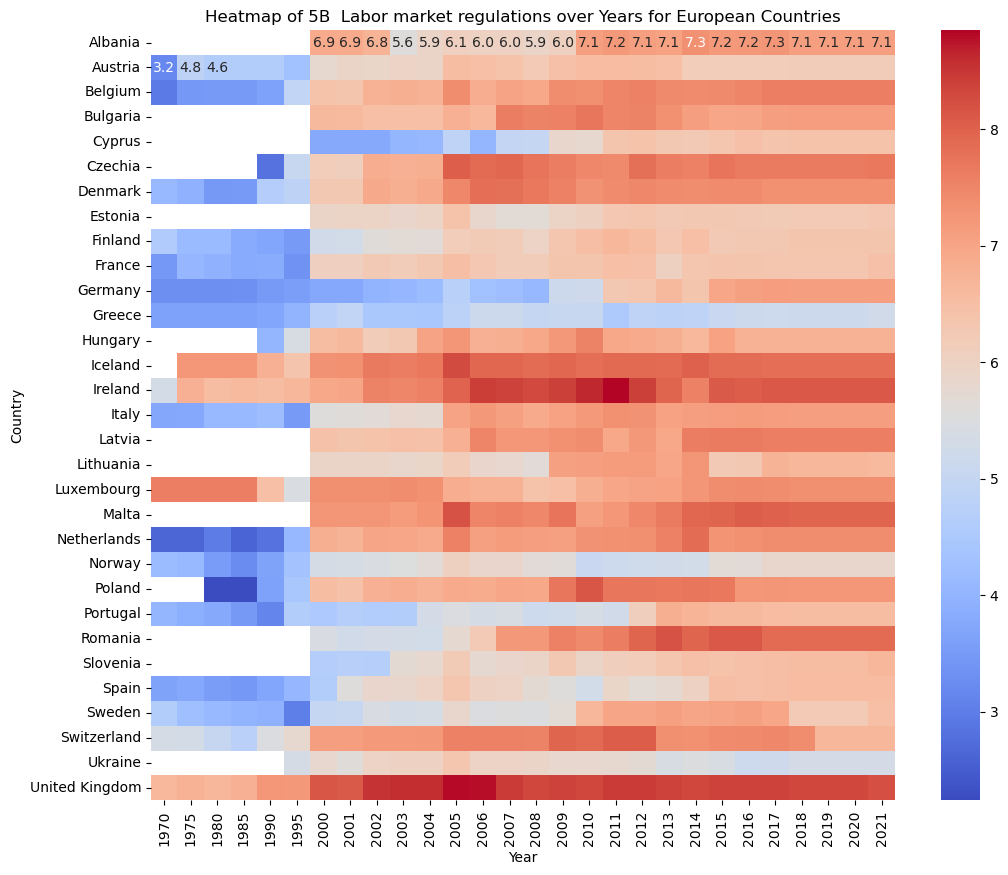

In [41]:
for var in variables:
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivoted_data[var], annot=True, cmap='coolwarm', fmt=".1f")
    plt.title(f"Heatmap of {var} over Years for European Countries")
    plt.xlabel('Year')
    plt.ylabel('Country')
    plt.show()

In [42]:
comparison_data = filtered_data[['Countries', '4Bii  Costs of importing and exporting','4Aii  Mean tariff rate']]

In [43]:
comparison_data_melted = comparison_data.melt(id_vars=['Countries'], var_name='Metric', value_name='Value')

In [ ]:
#This double bar chart compares mean tariff rate and costs of importing and exporting in European countries in 2021. 

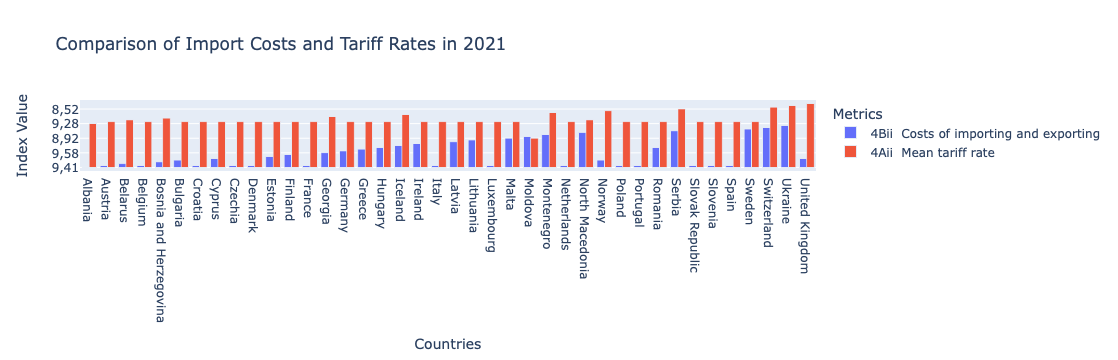

In [44]:
fig = px.bar(comparison_data_melted, 
             x='Countries', 
             y='Value', 
             color='Metric', 
             barmode='group',
             title='Comparison of Import Costs and Tariff Rates in 2021',
             labels={'Value': 'Index Value', 'Countries': 'Countries'})

fig.update_layout(xaxis_title='Countries',
                  yaxis_title='Index Value',
                  legend_title='Metrics')

fig.show()